In [16]:
##################################################
#HIV infection modeling, chapter 1
#Physical modeling of living systems
#Pinaki
##################################################
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#importing data
data=pd.read_csv('../PMLSdata/Datasets/01HIVseries/HIVseries.csv')
t=data.time
y=data.cells

In [18]:
data

,time,cells
0,0.0000,106100.0
1,0.0831,93240.0
2,0.1465,166720.0
3,0.2587,153780.0
4,0.4828,118800.0
5,0.7448,116900.0
6,0.9817,109570.0
7,1.2563,111350.0
8,1.4926,74388.0
9,1.7299,83291.0


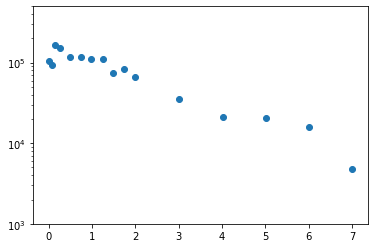

In [19]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(t,y)
ax.set_ylim(1000,500000)
ax.set_yscale('log')

We want to fit the data with trial solution from the leaking container model.

In [20]:
%%latex
\begin{align}
N_v(t)=X e^{-k_I t}+ (N_{v0}-X)e^{-k_V t} \\
\end{align}

<IPython.core.display.Latex object>

In [21]:
%%latex
where
\begin{align}
X=\frac{\beta}{k_V-k_I} \\
\end{align}

<IPython.core.display.Latex object>

In [22]:
#Trial solution I want to superimpose with arbiary values
k_V=10.
k_I=1.
beta=1000
X=beta/(k_V-k_I)
Nv0=106100
Nv=X*np.exp(-k_I*t)+(Nv0-X)*np.exp(-k_V*t)

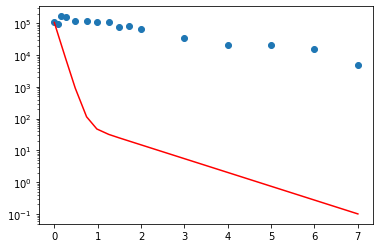

In [25]:
#plotting the trial solution with arbitary parameters
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(t,y)
plt.plot(t,Nv,'red')
ax.set_yscale('log')

Not surprisingly, it does not fit the data.

We will try to fit the long time behaviour with a simple exponential, which is a line on log scale.

In [26]:
#choosing better parameters by finding a line that may best fit the long time trend
#Two points of a line that passess through the long time trend
t1=1.9915
y1=66435
t2=4.5
y2=20693
slope=(np.log(y2)-np.log(y1))/(t2-t1)
intercept=np.log(y1)-slope*t1

Footnote: How to get the slope and intercept from a line if we know two points?

In [27]:
%%latex
Equation of a line passing through two points ($x_1, y_1$) and ($x_2, y_2$) is
\begin{align}
y-y_1=\frac{(y_2-y_1)}{(x_2-x_1)}(x-x_1) 
\end{align}

<IPython.core.display.Latex object>

We can rewrite the above equation in the form of 

$y=mx+c$

where m is the slope and c is the intercept with the y-axis

In [28]:
%%latex
\begin{align}
y=y_1 + \frac{(y_2-y_1)}{(x_2-x_1)}(x-x_1) 
\end{align}

<IPython.core.display.Latex object>

In [29]:
%%latex
Rearranging the terms on right hand side,
\begin{align}
y=\frac{(y_2-y_1)}{(x_2-x_1)}(x)+ y_1 - \frac{(y_2-y_1)}{(x_2-x_1)}(x_1) 
\end{align}

<IPython.core.display.Latex object>

By comparing the above equation with $y=mx+c$, we can see that

In [30]:
%%latex
\begin{align}
m=\frac{(y_2-y_1)}{(x_2-x_1)}
\end{align}
\begin{align}
c=y_1-\frac{(y_2-y_1)}{(x_2-x_1)}(x_1)=y_1-mx_1
\end{align}

<IPython.core.display.Latex object>

In [31]:
#Plotting the fitting function for long time trend on log scale
f=np.exp(intercept+slope*t)

In [79]:
slope, intercept

(-0.46499045135083883, 12.030007788890604)

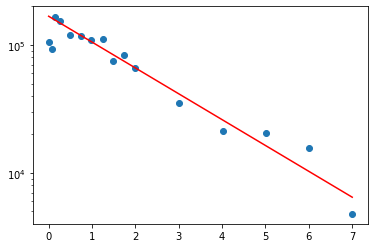

In [34]:
#plotting the fitted line for long time trend
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(t,y)
plt.plot(t,f,'red')
ax.set_yscale('log')

In [35]:
#Going back to our model
X=np.exp(intercept)
k_I=-slope

In [36]:
Nv=X*np.exp(-k_I*t)+(Nv0-X)*np.exp(-k_V*t)

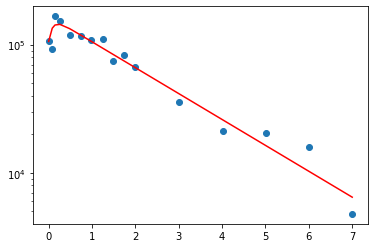

In [37]:
#plotting the trial solution with somewhat better parameters
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(t,y)
plt.plot(t,Nv,'red')
ax.set_yscale('log')

We can use additional information regarding the effect of drug at initial time to better fit the data.